In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

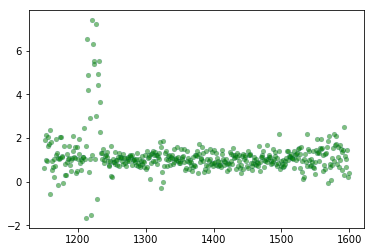

In [267]:
training_data = pd.read_csv("quasar_train.csv", dtype='float64')

# Header
header = np.array([float(x) for x in training_data.columns.values])
xses = np.array([[1, float(x)] for x in training_data.columns.values])

# First row of results of training data set
yses = np.array(data.iloc[0].tolist())

plt.plot(header, yses, 'go', markeredgecolor='blue', markeredgewidth='0.1', alpha=.5, ms=5)
plt.show()

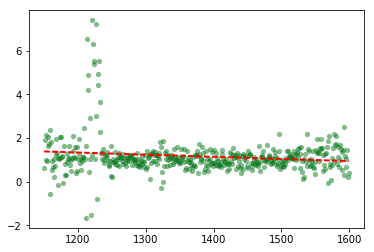

In [268]:
# Linear regression

# Calculating thetas
# Out: Vector of computed thetas
def thetas(x, y):
    return inv(np.transpose(x).dot(x)).dot(np.transpose(x)).dot(y)

t = thetas(xses, yses)

# Building the hypothesis 
# Out: Array of computed h(x) for each x in header
h_x = [ np.transpose(t).dot(x) for x in xses ]

plt.plot(header, yses, 'go', markeredgecolor='blue', markeredgewidth='0.1', alpha=.5, ms=5)
plt.plot(header, h_x, 'r--', lw=2)
plt.show()

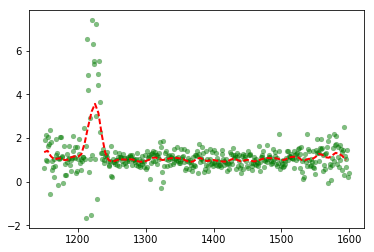

In [269]:
# Weighted linear regression

# Weight formula
# Input: x for which we are computing weights, xi, tau
# Output: wi
def weight(x, xi, tau):
    return np.exp(-((x - xi)**2) / (2 * tau **2))

# Diag matrix from computed weights
def diag_matr(x, x_arr, tau):
    return np.diag([weight(x, xi, tau) for xi in x_arr]);

# Getting weighted thetas for chosen x
def weighted_thetas(x, x_arr, x_row, y_arr, tau):
    weights = diag_matr(x, x_row, tau);
    return inv(np.transpose(x_arr).dot(weights).dot(x_arr)).dot(np.transpose(x_arr)).dot(weights).dot(y_arr)

# Step for weighing
tau = 5

# [[1, x0], [1, x1], ...] - x in range of xses with step tau
xses_tau = np.array([[1, x] for x in np.arange(header[0], header[len(header) - 1] + 1, tau)])

# Weighted thetas for computed xses_tau
wt = np.array([weighted_thetas(x, xses, header, yses, tau) for x in xses_tau[:,1]])

# Hypothesis for each x in xses_tau
h_wx = np.array([np.transpose(w).dot(x) for x,w in zip(xses_tau, wt)])

plt.plot(header, yses, 'go', markeredgecolor='black', markeredgewidth='0.1', alpha=.5, ms=5)
plt.plot(xses_tau[:,1], h_wx, 'r--', lw=2)
plt.show()